# Problem Statement

In [ ]:
To predict whether the patient has diabetes or not 

# Logistic Regression- diabetes

In [155]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv('diabetes.csv')
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [158]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

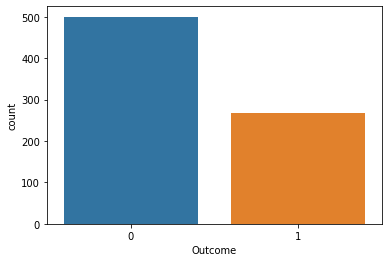

In [159]:
sns.countplot(x = df['Outcome'])

# Train Test Split

In [6]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

## Model Training

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

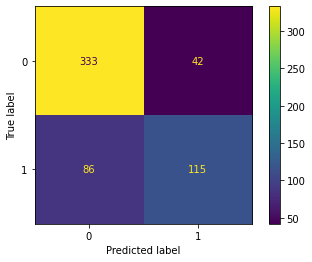

In [10]:
plot_confusion_matrix(logistic_model,x_train, y_train)

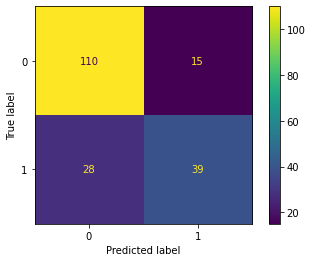

In [11]:
plot_confusion_matrix(logistic_model,x_test, y_test)

In [13]:
logistic_model.score(x_train, y_train)

0.7777777777777778

In [14]:
logistic_model.score(x_test, y_test)

0.7760416666666666

## Evaluation

In [15]:
# Testing Data Evaluation
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[110  15]
 [ 28  39]]
****************************************************************************************
Accuracy : 0.7760416666666666
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [16]:
y_pred = logistic_model.predict(x_test)
# y_pred

In [17]:
y_pred_prob = logistic_model.predict_proba(x_test)
# y_pred_prob

In [18]:
# TRaining Data Evaluation

y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[333  42]
 [ 86 115]]
****************************************************************************************
Accuracy : 0.7777777777777778
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       375
           1       0.73      0.57      0.64       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [20]:
y_pred_prob = logistic_model.predict_proba(x_train)
# y_pred_prob[:,1]
fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])
# tpr

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

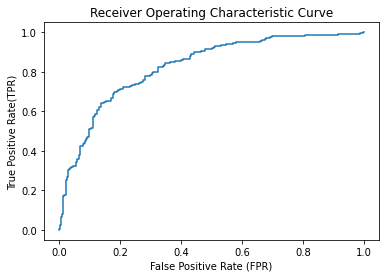

In [21]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curve")

# KNN Classifier 

In [93]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve

import matplotlib.pyplot as plt 
import seaborn as sns


## Model Evaluation

In [25]:
knn_clf = KNeighborsClassifier() # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Train test split

In [26]:
#Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[106  19]
 [ 32  35]]
********************************************************************************
Accuracy is : 0.734375
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.65      0.52      0.58        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



In [28]:
#Training

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[333  42]
 [ 71 130]]
********************************************************************************
Accuracy is : 0.8038194444444444
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       375
           1       0.76      0.65      0.70       201

    accuracy                           0.80       576
   macro avg       0.79      0.77      0.78       576
weighted avg       0.80      0.80      0.80       576



### Normalisation

In [46]:
x_df = df.drop('Outcome',axis = 1)
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x_df)
x_normal_df = pd.DataFrame(array,columns=x_df.columns)
x_normal_df 

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    0.743719       0.409836       0.353535  0.000000  0.500745   
1    0.427136       0.540984       0.292929  0.000000  0.396423   
2    0.919598       0.524590       0.000000  0.000000  0.347243   
3    0.753769       0.540984       0.232323  0.111111  0.418778   
4    0.753769       0.327869       0.353535  0.198582  0.642325   
..        ...            ...            ...       ...       ...   
763  0.507538       0.622951       0.484848  0.212766  0.490313   
764  0.613065       0.573770       0.272727  0.000000  0.548435   
765  0.608040       0.590164       0.232323  0.132388  0.390462   
766  0.633166       0.491803       0.000000  0.000000  0.448584   
767  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age  
0                    0.234415  0.483333  
1                    0.116567  0.166667  
2                    0.253629  0.516667  
3                    0.038002  0.000000  
4                    0.943638  0.200000  
..                        ...       ...  
763                  0.039710  0.700000  
764                  0.111870  0.100000  
765                  0.071307  0.150000  
766                  0.115713  0.433333  
767                  0.101196  0.033333  

[768 rows x 7 columns]

## Train test split

In [55]:
x = x_normal_df
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=20, stratify=y)


## Model Training

In [56]:
knn_clf = KNeighborsClassifier() # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluation with normalisation

In [57]:
#Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[107  18]
 [ 24  43]]
********************************************************************************
Accuracy is : 0.78125
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.70      0.64      0.67        67

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



In [58]:
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[328  47]
 [ 68 133]]
********************************************************************************
Accuracy is : 0.8003472222222222
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       375
           1       0.74      0.66      0.70       201

    accuracy                           0.80       576
   macro avg       0.78      0.77      0.77       576
weighted avg       0.80      0.80      0.80       576



 ## Standardisation

In [59]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x_df)
x_std_df = pd.DataFrame(array,columns=x_df.columns)
x_std_df.head()

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.845787      -0.985618       0.907270 -0.692891  0.204013   
1 -1.136319      -0.158966       0.530902 -0.692891 -0.684422   
2  1.946957      -0.262298      -1.288212 -0.692891 -1.103255   
3  0.908711      -0.158966       0.154533  0.123302 -0.494043   
4  0.908711      -1.502276       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.426022  
1                 -0.365061 -0.190927  
2                  0.604397  1.596227  
3                 -0.920763 -1.041953  
4                  5.484909 -0.020722

## train test split

In [60]:
x = x_std_df
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=20, stratify=y)


## Model Training

In [61]:
knn_clf = KNeighborsClassifier() # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Model Evaluation with std


In [62]:
#Testing
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[108  17]
 [ 26  41]]
********************************************************************************
Accuracy is : 0.7760416666666666
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       125
           1       0.71      0.61      0.66        67

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



In [64]:
#Training

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[331  44]
 [ 66 135]]
********************************************************************************
Accuracy is : 0.8090277777777778
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       375
           1       0.75      0.67      0.71       201

    accuracy                           0.81       576
   macro avg       0.79      0.78      0.78       576
weighted avg       0.81      0.81      0.81       576



## Hyper parameter tuning

## TTS

In [88]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=20,stratify=y)

In [89]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,20),
                  'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=17, p=1)

##  Model training

In [90]:
knn_clf = KNeighborsClassifier(n_neighbors=17, p=1) # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17, p=1)

## Model Evaluation with Hyperpara

In [91]:
# Training

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[336  39]
 [ 95 106]]
********************************************************************************
Accuracy is : 0.7673611111111112
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       375
           1       0.73      0.53      0.61       201

    accuracy                           0.77       576
   macro avg       0.76      0.71      0.72       576
weighted avg       0.76      0.77      0.76       576



In [92]:
#Testing

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[112  13]
 [ 32  35]]
********************************************************************************
Accuracy is : 0.765625
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       125
           1       0.73      0.52      0.61        67

    accuracy                           0.77       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192



## Sampling (SOMTE)

In [94]:
x= x_normal_df
y= df['Outcome']

smt = SMOTE()
x,y = smt.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=20,stratify=y)
x_train

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
117  0.391960       0.393443       0.000000  0.000000  0.502235   
549  0.949749       0.901639       0.313131  0.000000  0.424739   
38   0.452261       0.557377       0.424242  0.000000  0.569300   
996  0.710197       0.672131       0.377285  0.368450  0.548548   
139  0.527638       0.590164       0.292929  0.384161  0.549925   
..        ...            ...            ...       ...       ...   
1    0.427136       0.540984       0.292929  0.000000  0.396423   
347  0.582915       0.000000       0.000000  0.000000  0.350224   
414  0.693467       0.491803       0.353535  0.197400  0.515648   
984  0.724523       0.476147       0.330606  0.169308  0.470469   
824  0.483852       0.630469       0.277874  0.000000  0.529488   

     DiabetesPedigreeFunction       Age  
117                  0.245944  0.066667  
549                  0.257045  0.266667  
38                   0.181469  0.100000  
996                  0.181361  0.616667  
139                  0.034586  0.116667  
..                        ...       ...  
1                    0.116567  0.166667  
347                  0.046541  0.033333  
414                  0.194705  0.000000  
984                  0.141657  0.069666  
824                  0.147546  0.523461  

[750 rows x 7 columns]

In [95]:
 y_test.value_counts()

1    125
0    125
Name: Outcome, dtype: int64

In [96]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,20),
                  'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [97]:
knn_clf = KNeighborsClassifier(n_neighbors=3, p=2) # Euclidean Distance, k = 5
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [98]:
# Training

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[309  66]
 [ 12 363]]
********************************************************************************
Accuracy is : 0.896
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.82      0.89       375
           1       0.85      0.97      0.90       375

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



In [99]:
#Testing

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 95  30]
 [ 14 111]]
********************************************************************************
Accuracy is : 0.824
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       125
           1       0.79      0.89      0.83       125

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



# Decision Tree



In [116]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report, roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## TTS

In [124]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=20,stratify=y)

## Model Trainng

In [125]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

## Model Evaluation


In [126]:
#Testing

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[101  24]
 [ 32  35]]
Accuracy : 0.7083333333333334
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       125
           1       0.59      0.52      0.56        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192



In [127]:
#Training

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[375   0]
 [  0 201]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [128]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

## Hyperparameter tuning

In [130]:
dt_model = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf = GridSearchCV(dt_model,hyperparameters, cv = 5)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [131]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12)

## Model training

In [132]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=12)

## Model Evaluation

In [133]:
#Training

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[276  99]
 [ 29 172]]
********************************************************************************
Accuracy : 0.7777777777777778
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       375
           1       0.63      0.86      0.73       201

    accuracy                           0.78       576
   macro avg       0.77      0.80      0.77       576
weighted avg       0.81      0.78      0.78       576



In [134]:
 #testing

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[93 32]
 [12 55]]
********************************************************************************
Accuracy : 0.7708333333333334
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       125
           1       0.63      0.82      0.71        67

    accuracy                           0.77       192
   macro avg       0.76      0.78      0.76       192
weighted avg       0.80      0.77      0.78       192



In [135]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_With_HYP.png')

## Prunning

In [137]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

## CCP Alpha

In [139]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00114734, 0.00132429, 0.0015191 , 0.00154321,
       0.0015625 , 0.00160256, 0.00162037, 0.00166934, 0.00173611,
       0.00185185, 0.00201389, 0.0020202 , 0.00231481, 0.00231481,
       0.0025343 , 0.00260417, 0.00270062, 0.00277778, 0.00277778,
       0.00277778, 0.00277778, 0.00277778, 0.00284455, 0.00289352,
       0.00296915, 0.0030079 , 0.00302222, 0.00303819, 0.00325521,
       0.0034188 , 0.0035108 , 0.00378788, 0.00391007, 0.00403067,
       0.00419147, 0.00420673, 0.00462963, 0.00465416, 0.00481646,
       0.00491942, 0.00492822, 0.00505051, 0.00520255, 0.00563215,
       0.00722834, 0.00736532, 0.00886886, 0.00995684, 0.01053818,
       0.01104311, 0.02172951, 0.02669212, 0.07286848])

In [142]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(random_state=30,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf.score(x_train, y_train))
    test_accuracy_list.append(dt_clf.score(x_test, y_test))
    
# train_accuracy_list
test_accuracy_list[44]

0.8072916666666666

In [141]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([44], dtype=int64),)

In [143]:
ccp_alpha_list[44]

0.005632152910616467

In [144]:
train_accuracy_list[44]

0.8159722222222222

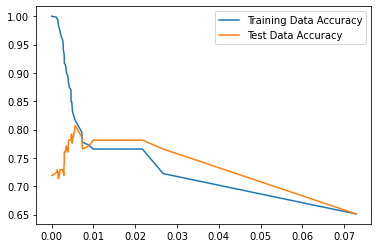

In [145]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [146]:
decision_tree_model = DecisionTreeClassifier(random_state=15,ccp_alpha=ccp_alpha_list[44])
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005632152910616467, random_state=15)

## Model Evaluation After prunning

In [147]:
# Testing
y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[115  10]
 [ 27  40]]
Accuracy : 0.8072916666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       125
           1       0.80      0.60      0.68        67

    accuracy                           0.81       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.81      0.81      0.80       192



In [148]:
#Training

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[342  33]
 [ 73 128]]
Accuracy : 0.8159722222222222
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       375
           1       0.80      0.64      0.71       201

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.81      0.82      0.81       576



# Random forest

In [160]:
## Importing lab


In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
smt = SMOTE()
x, y = smt.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=12, test_size=.25,stratify =y)

## Model training

In [163]:
rf_class = RandomForestClassifier()
rf_class.fit(x_train, y_train)

RandomForestClassifier()

## TTS

In [164]:
## ## Training Data Evaluation
y_pred = rf_class.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix :\n', cnf_matrix)
print('*'*80)

Accuracy = accuracy_score(y_train, y_pred)
print('Accuracy :', Accuracy)
print('*'*80)

clf_report = classification_report(y_train, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[375   0]
 [  0 375]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [165]:
## Testing Data Evaluation
y_pred_test = rf_class.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix :\n', cnf_matrix)
print('*'*80)

Accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy :', Accuracy)
print('*'*80)

clf_report = classification_report(y_test, y_pred_test)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[103  22]
 [ 14 111]]
********************************************************************************
Accuracy : 0.856
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       125
           1       0.83      0.89      0.86       125

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Random Forest Hyperparameter Tuning

In [166]:
# rf_model = RandomForestClassifier()
# Hyperparameters = { 'n_estimators'=100,        # No. of Decision Trees
#                     'criterion'='gini',        # gini or entropy
#                     'max_depth'=None,          # Depth of decision tree
#                     'min_samples_split'=2,
#                     'min_samples_leaf'=1,
#                     'max_features'='auto',
#                     'bootstrap'=True,
#                     'oob_score'=False,}

In [167]:
rf_model = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 7)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=11, n_estimators=143, oob_score=True,
                       random_state=11)

In [168]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=11, n_estimators=143, oob_score=True,
                       random_state=11)

In [169]:
## Training Data Evaluation 

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[308  67]
 [ 28 347]]
********************************************************************************
Accuracy : 0.8733333333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       375
           1       0.84      0.93      0.88       375

    accuracy                           0.87       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.88      0.87      0.87       750



In [170]:
## Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[102  23]
 [ 17 108]]
********************************************************************************
Accuracy : 0.84
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.82      0.86      0.84       125

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [173]:
df1= pd.read_csv('Diabetes_results.csv')
df1

Algorithm Accuracy  Accuracy .1 Precision  \
0                                 NaN     Train        Test     Train   
1                 Logistic Regression      0.77        0.77      0.73   
2                      KNN Classifier       0.8        0.73      0.76   
3   KNN Classifier with normalisation       0.8        0.78      0.74   
4   KNN Classifier with stdardisation      0.81        0.77      0.75   
5        KNN Classifier with hpt-gscv      0.77        0.76      0.73   
6   KNN Classifier with sampling-gscv      0.89        0.82      0.85   
7                       Decision Tree         1        0.71         1   
8         Decision Tree with hpt-gscv      0.78        0.77      0.63   
9         Decision Tree with prunning      0.81        0.81       0.8   
10               Random Forest -SMOTE         1        0.86         1   
11            Random Forest -hpt-rscv      0.87        0.84      0.84   

   Precision.1 Recall Recall.1  
0         Test  Train     Test  
1         0.72   0.57     0.58  
2         0.65   0.65     0.52  
3          0.7   0.66     0.64  
4         0.71   0.67     0.61  
5         0.73   0.53     0.52  
6         0.79   0.97     0.89  
7         0.59      1     0.52  
8         0.63   0.86     0.82  
9          0.8   0.64      0.6  
10        0.83      1     0.89  
11        0.82   0.93     0.86

# One line testing

In [178]:
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [177]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [187]:
Glucose = 148
BloodPressure = 50
SkinThickness =35
Insulin = 0
BMI =33.6
DiabetesPedigreeFunction =0.627
Age= 50

In [188]:
column_name = x.columns
column_name

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [189]:
test_array = np.zeros(x.shape[1],dtype = int)
test_array

array([0, 0, 0, 0, 0, 0, 0])

In [193]:
test_array = np.zeros(x.shape[1],dtype = int)
test_array[0]=Glucose
test_array[1]=BloodPressure
test_array[2]=SkinThickness
test_array[3]=Insulin
test_array[4]=BMI
test_array[5]=DiabetesPedigreeFunction
test_array[6]=Age

test_array 

array([148,  50,  35,   0,  33,   0,  50])

In [195]:
rf_model.predict ([test_array])

array([1], dtype=int64)

In [197]:
import pickle

with open("diabetes_data_pkl.pkl",'wb') as f:
    pickle.dump(rf_model,f)